In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler


### 1. Data Preprocessing

In [3]:
data_path = 'AirQualityUCI.csv'
df = pd.read_csv(data_path, sep=';', decimal=',', low_memory=False)

df = df.iloc[:, :-2]  # Removing last two columns (Date & Time)
df = df.apply(pd.to_numeric, errors='coerce')  # Convert all to numeric


In [4]:
# Handle missing values
df.fillna(df.median(), inplace=True)


In [5]:
# Select relevant features (pollutant levels & sensor readings)
features = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
            'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
df = df[features]


In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [7]:
# Save the preprocessed dataset to a new CSV file
preprocessed_data_path = 'AirQuality_Preprocessed.csv'
df.to_csv(preprocessed_data_path, index=False)

print(f"Preprocessed dataset saved to {preprocessed_data_path}")


Preprocessed dataset saved to AirQuality_Preprocessed.csv


In [8]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


### 2. K-Means Clustering

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

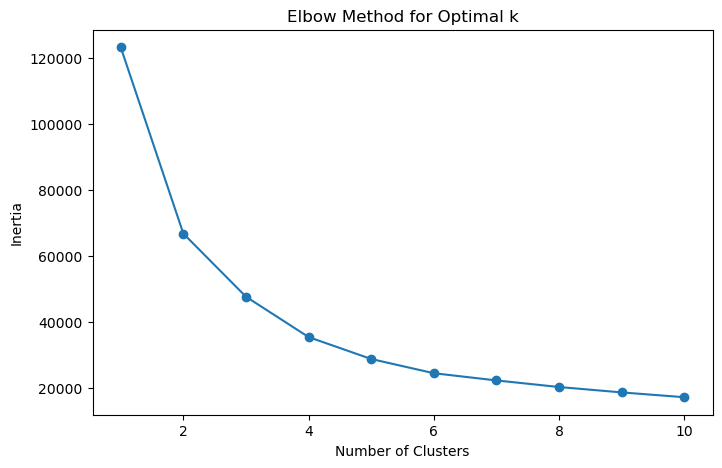

In [9]:
#elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [10]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)


C:\Users\RISHIKA RAVICHANDRAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RISHIKA RAVICHANDRAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RISHIKA RAVICHANDRAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RISHIKA RAVICHANDRAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

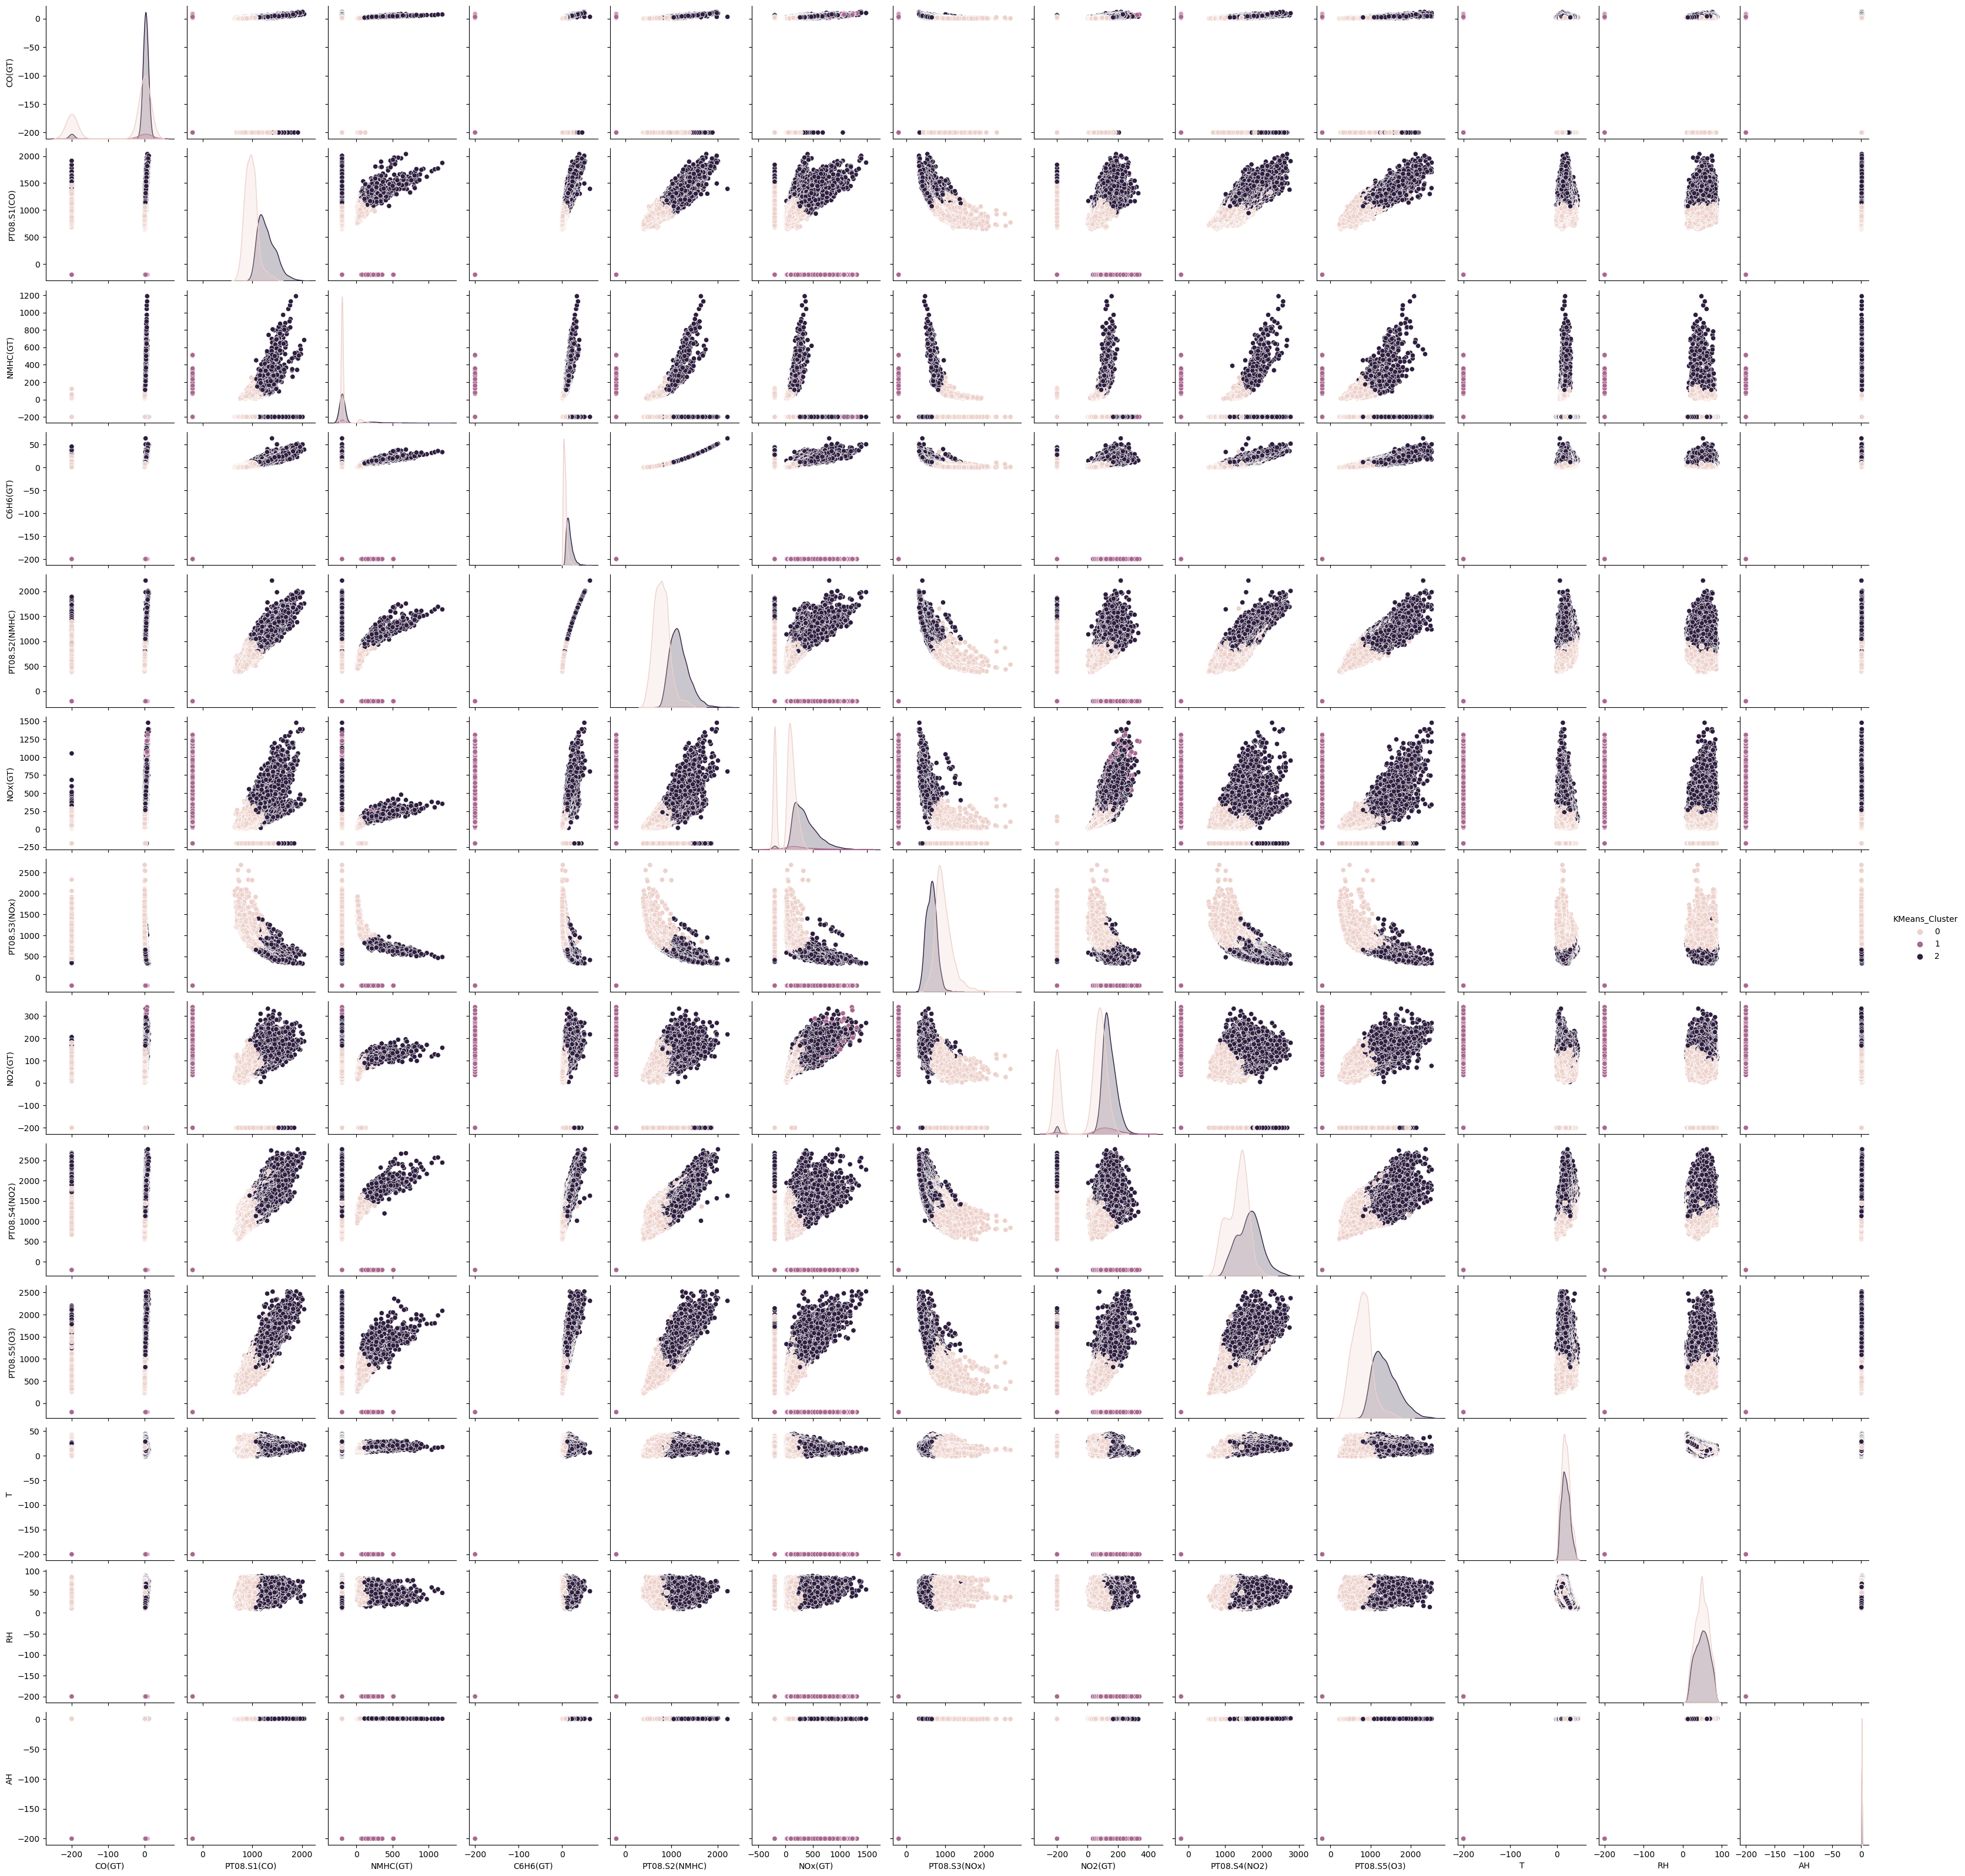

In [11]:
sns.pairplot(df, hue='KMeans_Cluster', diag_kind='kde')
plt.show()

### 3. Hierarchical Clustering

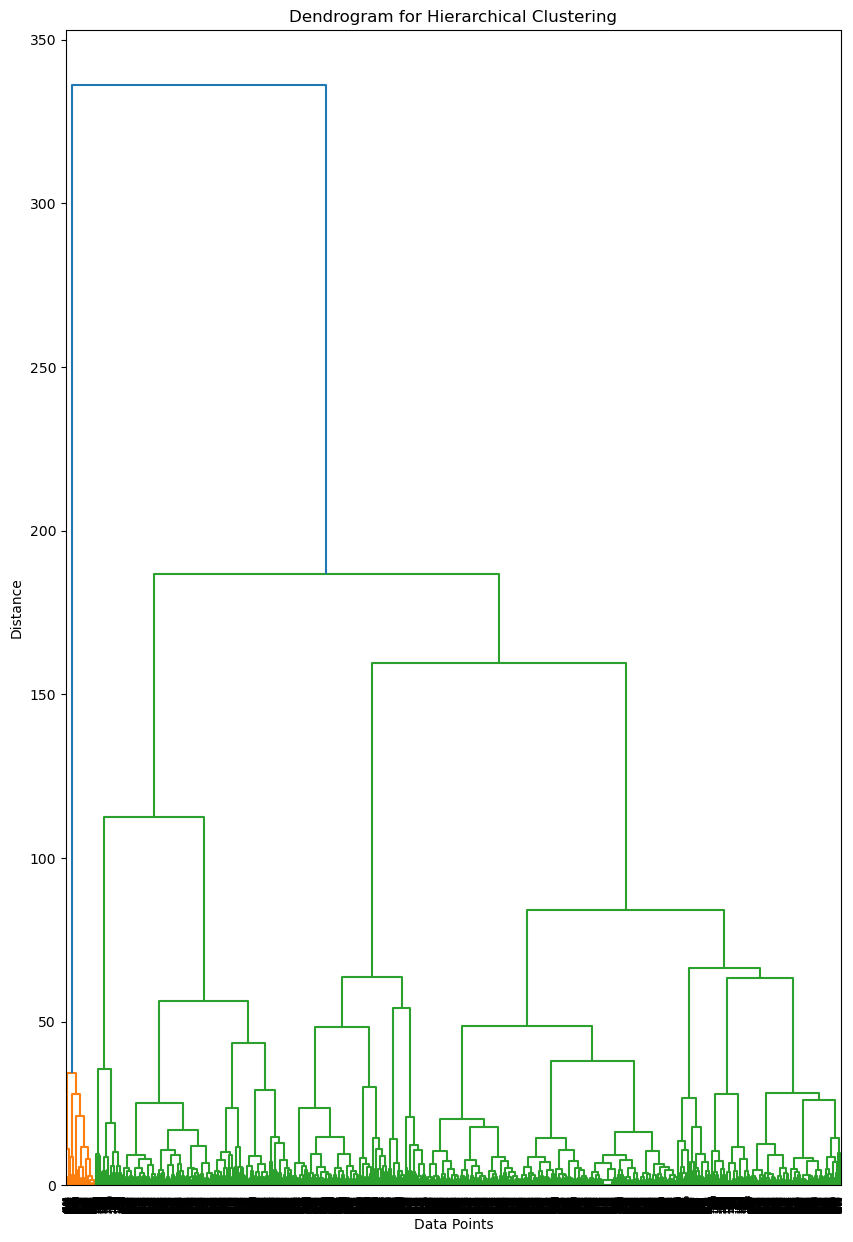

In [12]:
#linkage
linkage_matrix = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 15))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [13]:
#agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
df['Hierarchical_Cluster'] = hierarchical.fit_predict(scaled_data)


### 4. PCA

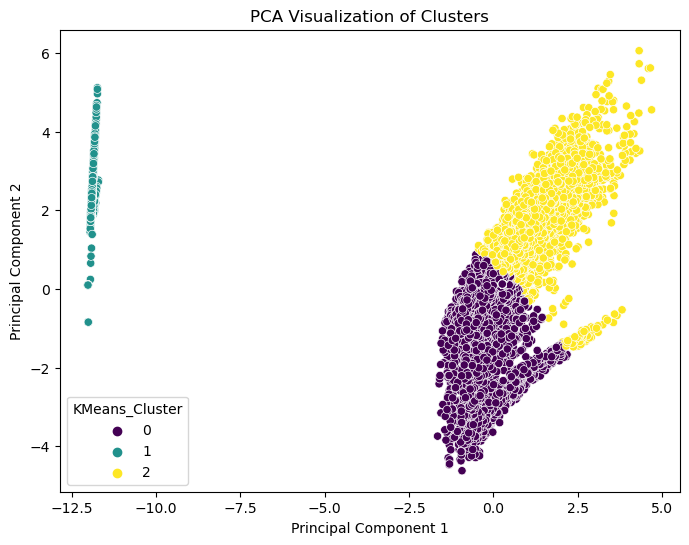

In [14]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df['PCA1'], df['PCA2'] = pca_result[:, 0], pca_result[:, 1]
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['KMeans_Cluster'], palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Clusters')
plt.show()

In [ ]:
explained_variance = pca.explained_variance_ratio_
print(f"PC1: {explained_variance[0]:.2f}, PC2: {explained_variance[1]:.2f}")
print(f"Total variance explained by PC1 & PC2: {np.sum(explained_variance[:2]):.2%}")

### 5. Anomaly detection

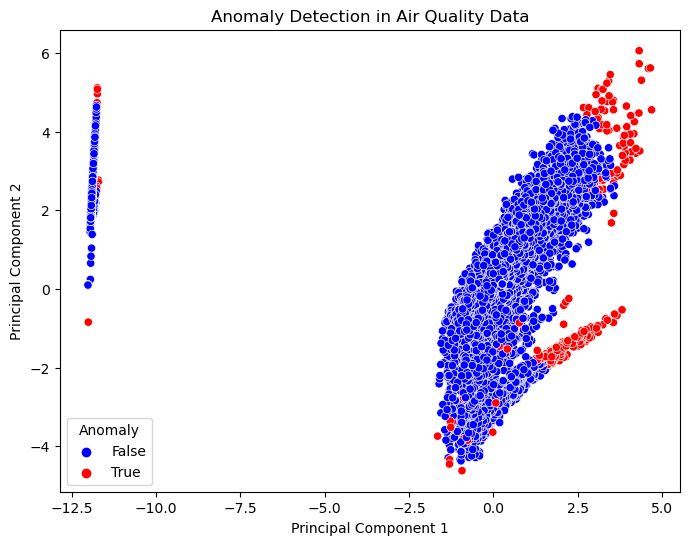

Identified 474 anomalies in the dataset.


In [16]:
distances = np.min(kmeans.transform(scaled_data), axis=1)
thresh = np.percentile(distances, 95)  # Top 5% as anomalies
df['Anomaly'] = distances > thresh

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Anomaly'], palette={False: 'blue', True: 'red'})
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Anomaly Detection in Air Quality Data')
plt.show()

num_anomalies = df['Anomaly'].sum()
print(f"Identified {num_anomalies} anomalies in the dataset.")